# GreenSort: Computer Vision for Waste Classification - Project Template

## Domain Proyek

Klasifikasi sampah menggunakan computer vision merupakan salah satu solusi teknologi yang penting dalam mengatasi permasalahan pengelolaan sampah global. Dengan volume sampah yang terus meningkat setiap tahunnya, diperlukan sistem yang efisien untuk mengidentifikasi dan memilah berbagai jenis sampah secara otomatis.

GreenSort adalah sistem klasifikasi sampah berbasis computer vision yang bertujuan memfasilitasi proses jual-beli sampah antara pengguna dan perantara/admin, yang kemudian akan menjualnya kembali ke industri daur ulang. Sistem ini memungkinkan pengguna untuk memfoto sampah, mengklasifikasikannya secara otomatis, dan mendapatkan estimasi harga berdasarkan jenis dan jumlahnya.

Kasus ini perlu diselesaikan karena:
1. Pengelolaan sampah yang tepat merupakan tantangan lingkungan global
2. Proses manual memilah sampah memakan waktu dan tidak efisien
3. Pendekatan berbasis teknologi dapat meningkatkan tingkat daur ulang dan mengurangi sampah yang berakhir di TPA
4. Menciptakan nilai ekonomi dari sampah dapat mendorong masyarakat untuk berpartisipasi dalam pengelolaan sampah

[An image classification dataset of waste items across 9 major material types, collected within an authentic landfill environment.](https://archive.ics.uci.edu/dataset/908/realwaste)

## Business Understanding

### Problem Statements

1. Bagaimana mengembangkan sistem klasifikasi sampah yang akurat menggunakan computer vision untuk mengidentifikasi 9 kategori sampah berbeda?
2. Bagaimana mengimplementasikan model klasifikasi yang dapat dijalankan di browser untuk memudahkan akses pengguna tanpa memerlukan infrastruktur server yang kompleks?
3. Bagaimana cara mengintegrasikan model computer vision dengan sistem estimasi harga dan perhitungan biaya pengiriman?

### Goals

1. Mengembangkan model klasifikasi sampah dengan akurasi minimal 85% untuk 9 kategori sampah dalam dataset RealWaste.
2. Mengkonversi model machine learning menjadi format TensorFlow.js yang dapat dijalankan di browser dengan performa yang tetap optimal.
3. Merancang sistem untuk estimasi harga otomatis berdasarkan jenis sampah, jumlah, dan opsi pengiriman.

### Solution Statements

1. Mengembangkan model deep learning berbasis CNN dengan dua pendekatan:
   - Menggunakan arsitektur CNN custom yang dirancang khusus untuk klasifikasi sampah
   - Menggunakan transfer learning dengan pre-trained models seperti MobileNetV2, EfficientNet, atau ResNet50 yang dioptimalkan untuk perangkat dengan komputasi terbatas

2. Meningkatkan performa model dengan:
   - Data augmentation untuk memperkaya dataset
   - Hyperparameter tuning untuk mengoptimalkan model
   - Teknik ensemble learning untuk meningkatkan akurasi prediksi

3. Mengkonversi model menjadi format TensorFlow.js dengan:
   - Optimasi model melalui model pruning dan quantization untuk mengurangi ukuran model
   - Implementasi caching model di browser untuk penggunaan offline

## Data Understanding

Dataset yang digunakan dalam proyek ini adalah dataset RealWaste yang tersedia di UCI Machine Learning Repository: [RealWaste Dataset](https://archive.ics.uci.edu/dataset/908/realwaste).

Dataset ini berisi gambar sampah yang diklasifikasikan ke dalam 9 kategori:
1. Cardboard (Kardus)
2. Food Organics (Sampah Organik Makanan)
3. Glass (Kaca)
4. Metal (Logam)
5. Miscellaneous Trash (Sampah Campuran)
6. Paper (Kertas)
7. Plastic (Plastik)
8. Textile Trash (Sampah Tekstil)
9. Vegetation (Sampah Tumbuhan)

### Eksplorasi Dataset

In [1]:
import tensorflow as tf
print("GPU tersedia:", tf.config.list_physical_devices('GPU'))

2025-04-17 16:55:14.060679: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-17 16:55:14.337473: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744883714.439476    2208 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744883714.473310    2208 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744883714.741983    2208 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

GPU tersedia: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


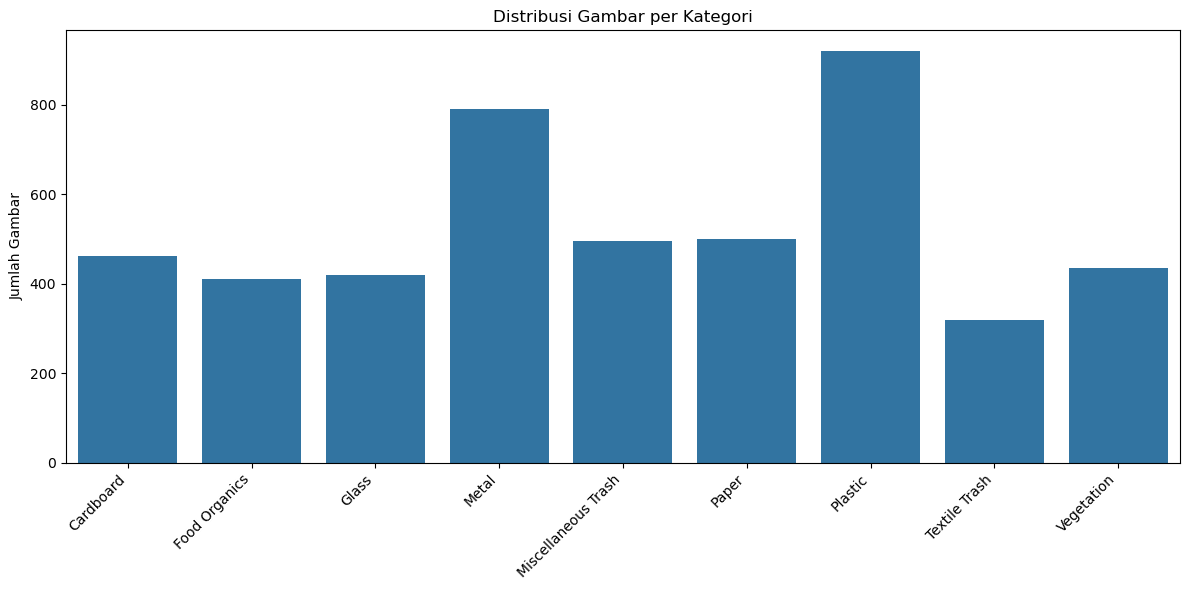

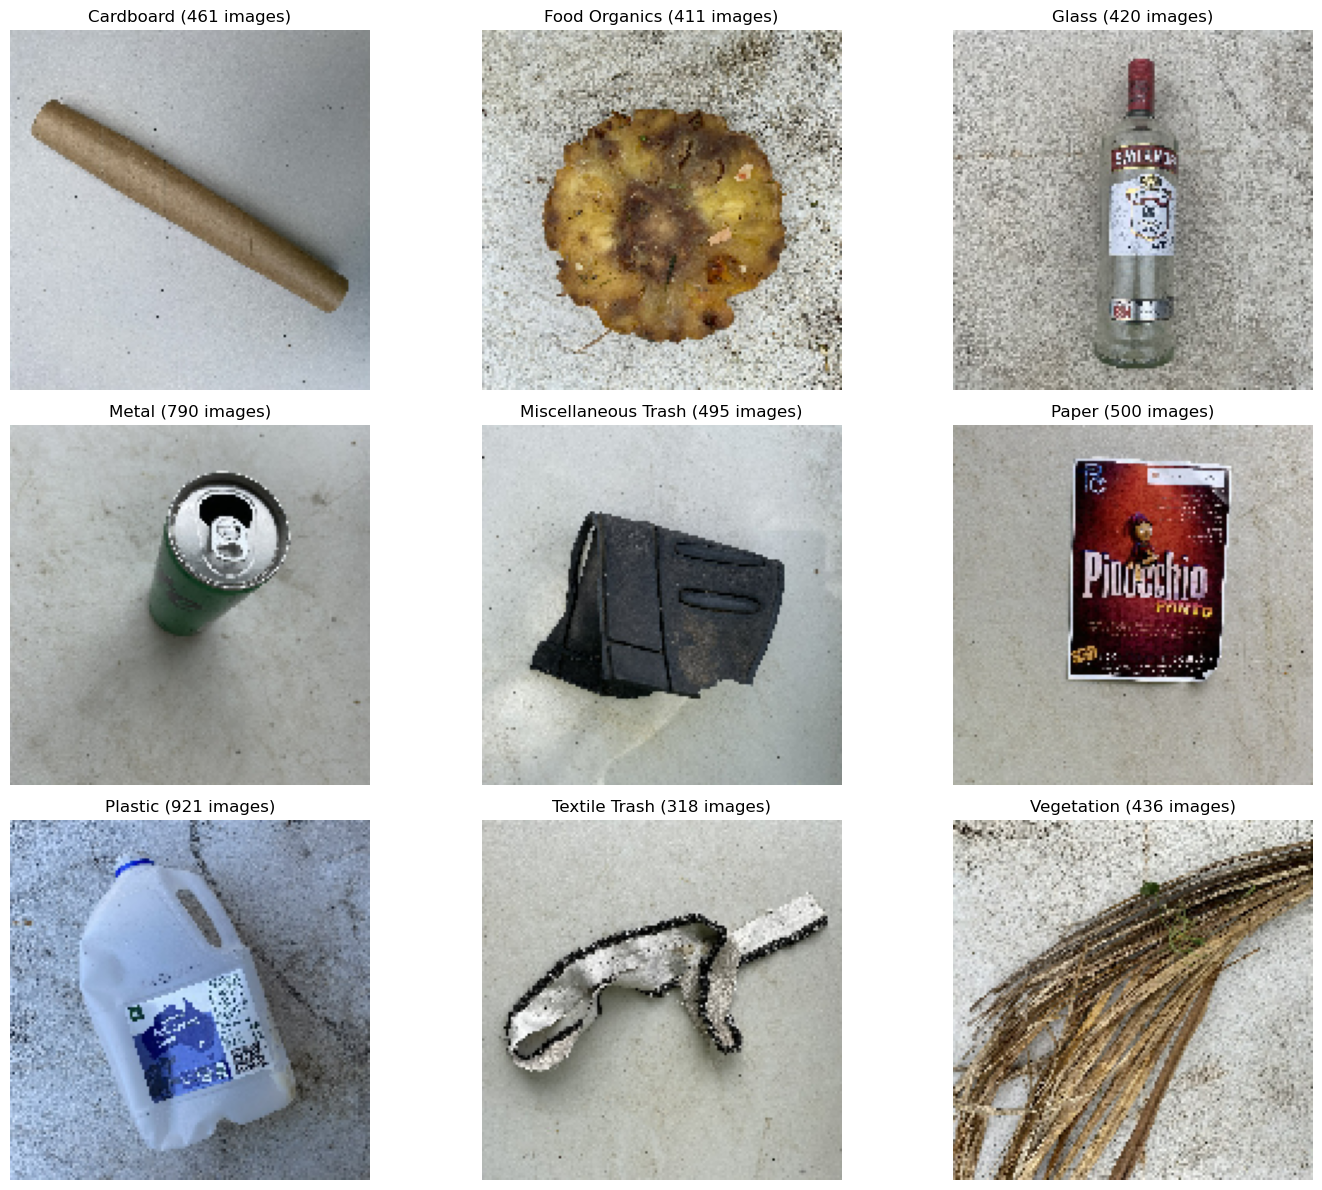

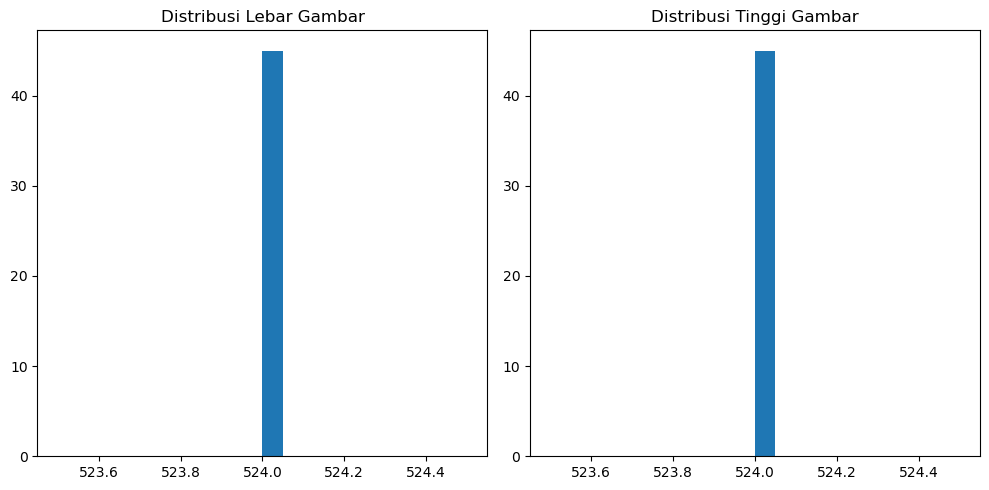

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img

# Path ke dataset
dataset_path = "ComputerVision/realwaste-main/RealWaste"
categories = ['Cardboard', 'Food Organics', 'Glass', 'Metal',
              'Miscellaneous Trash', 'Paper', 'Plastic',
              'Textile Trash', 'Vegetation']

# Menghitung jumlah gambar per kategori
counts = {}
for category in categories:
    category_path = os.path.join(dataset_path, category)
    counts[category] = len(os.listdir(category_path))

# Visualisasi distribusi data
plt.figure(figsize=(12, 6))
sns.barplot(x=list(counts.keys()), y=list(counts.values()))
plt.xticks(rotation=45, ha='right')
plt.title('Distribusi Gambar per Kategori')
plt.ylabel('Jumlah Gambar')
plt.tight_layout()
plt.show()

# Menampilkan contoh gambar dari setiap kategori
plt.figure(figsize=(15, 12))
for i, category in enumerate(categories):
    category_path = os.path.join(dataset_path, category)
    img_files = os.listdir(category_path)
    if img_files:
        img_path = os.path.join(category_path, img_files[0])
        img = load_img(img_path, target_size=(150, 150))
        plt.subplot(3, 3, i+1)
        plt.imshow(img)
        plt.title(f"{category} ({counts[category]} images)")
        plt.axis('off')
plt.tight_layout()
plt.show()

# Memeriksa ukuran gambar
image_sizes = []
for category in categories:
    category_path = os.path.join(dataset_path, category)
    img_files = os.listdir(category_path)[:5]  # Cek 5 gambar per kategori
    for img_file in img_files:
        img_path = os.path.join(category_path, img_file)
        with Image.open(img_path) as img:
            width, height = img.size
            image_sizes.append((width, height))

# Visualisasi distribusi ukuran gambar
widths, heights = zip(*image_sizes)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(widths, bins=20)
plt.title('Distribusi Lebar Gambar')
plt.subplot(1, 2, 2)
plt.hist(heights, bins=20)
plt.title('Distribusi Tinggi Gambar')
plt.tight_layout()
plt.show()

Visualisasi dan eksplorasi data membantu kita memahami:
1. Distribusi kelas - apakah dataset seimbang atau tidak
2. Variasi ukuran gambar - mempengaruhi preprocessing
3. Karakteristik visual sampah - untuk memahami tantangan klasifikasi

## Data Preparation

In [3]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Mengumpulkan path gambar dan label
image_paths = []
labels = []

for category_idx, category in enumerate(categories):
    category_path = os.path.join(dataset_path, category)
    for img_file in os.listdir(category_path):
        if img_file.endswith(('jpg', 'jpeg', 'png')):
            img_path = os.path.join(category_path, img_file)
            image_paths.append(img_path)
            labels.append(category_idx)

# Konversi ke array numpy
image_paths = np.array(image_paths)
labels = np.array(labels)

# Membagi dataset menjadi train (70%), validation (15%), dan test (15%)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    image_paths, labels, test_size=0.15, stratify=labels, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.176, stratify=y_train_val, random_state=42
)

print(f"Train set: {len(X_train)} images")
print(f"Validation set: {len(X_val)} images")
print(f"Test set: {len(X_test)} images")

Train set: 3328 images
Validation set: 711 images
Test set: 713 images


### 2. Data Augmentation dan Preprocessing

In [4]:
# Ukuran gambar untuk model
IMG_SIZE = 224
BATCH_SIZE = 32

# Data augmentation untuk training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Hanya rescaling untuk validation dan test set
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Fungsi untuk memuat gambar dari path
def load_and_preprocess_from_path_label(path, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [IMG_SIZE, IMG_SIZE])
    img = img / 255.0  # Normalisasi [0,1]
    return img, label

# Membuat dataset TensorFlow
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_ds = train_ds.map(load_and_preprocess_from_path_label)
train_ds = train_ds.shuffle(buffer_size=1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_ds = val_ds.map(load_and_preprocess_from_path_label)
val_ds = val_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_ds = test_ds.map(load_and_preprocess_from_path_label)
test_ds = test_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

I0000 00:00:1744883734.419214    2208 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Alasan dilakukan data preparation:
1. **Pembagian dataset**: Memisahkan data menjadi train, validation, dan test untuk evaluasi model yang tidak bias.
2. **Data Augmentation**: Menambah variasi pada data training untuk meningkatkan kemampuan generalisasi model dan mengurangi overfitting.
3. **Preprocessing**: Normalisasi dan resizing gambar untuk konsistensi input model.
4. **Batching dan Prefetching**: Mengoptimalkan performa training dengan mempersiapkan batch data dan menggunakan pipeline yang efisien.

## Modeling

### 1: Transfer Learning dengan MobileNetV2

In [5]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

# Base model MobileNetV2
base_model = MobileNetV2(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights='imagenet'
)

# Freeze base model
base_model.trainable = False

# Membangun model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(categories), activation='softmax')
])

# Compile model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Training dengan callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=[early_stopping]
)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         2,313 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,588,233 (9.87 MB)

 Trainable params: 330,249 (1.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/50


I0000 00:00:1744883747.861566    2449 service.cc:152] XLA service 0x7fb4100020f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744883747.861618    2449 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-04-17 16:55:47.953510: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1744883748.550627    2449 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-04-17 16:55:49.836141: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4365', 204 bytes spill stores, 204 bytes spill loads

2025-04-17 16:55:49.883027: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fus

  3/104 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.1615 - loss: 2.9760  

I0000 00:00:1744883757.651715    2449 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


103/104 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.4424 - loss: 1.6725

2025-04-17 16:56:14.961491: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1169', 8 bytes spill stores, 8 bytes spill loads

2025-04-17 16:56:15.101207: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1169', 12 bytes spill stores, 12 bytes spill loads

2025-04-17 16:56:15.403776: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1169_0', 184 bytes spill stores, 520 bytes spill loads

2025-04-17 16:56:15.846270: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1169', 4748 bytes spill stores, 4760 bytes spill loads

2025-04-17 16:56:15.895682: I exte

104/104 ━━━━━━━━━━━━━━━━━━━━ 39s 215ms/step - accuracy: 0.4445 - loss: 1.6652 - val_accuracy: 0.7342 - val_loss: 0.8074
Epoch 2/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.7038 - loss: 0.8261 - val_accuracy: 0.7482 - val_loss: 0.6858
Epoch 3/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.7738 - loss: 0.6226 - val_accuracy: 0.7693 - val_loss: 0.6214
Epoch 4/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.8153 - loss: 0.5347 - val_accuracy: 0.7834 - val_loss: 0.5861
Epoch 5/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.8498 - loss: 0.4213 - val_accuracy: 0.7932 - val_loss: 0.5877
Epoch 6/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.8640 - loss: 0.3911 - val_accuracy: 0.8017 - val_loss: 0.5546
Epoch 7/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.8845 - loss: 0.3273 - val_accuracy: 0.8003 - val_loss: 0.5452
Epoch 8/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.9105 - loss: 0.2815 - val_accuracy: 0.8

### Pendekatan 2: Custom CNN Architecture

In [6]:
# Model CNN Custom
custom_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(categories), activation='softmax')
])

# Compile model
custom_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

custom_model.summary()

# Training
custom_history = custom_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=[early_stopping]
)

/home/bayuardiyansyah/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │         4,617 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,683,145 (36.94 MB)

 Trainable params: 9,683,145 (36.94 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.1990 - loss: 2.2638

2025-04-17 16:58:47.063914: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_98', 48 bytes spill stores, 48 bytes spill loads

2025-04-17 16:58:47.070960: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_98', 264 bytes spill stores, 264 bytes spill loads

2025-04-17 16:58:47.080704: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_98', 208 bytes spill stores, 208 bytes spill loads

2025-04-17 16:58:50.694953: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_98', 124 bytes spill stores, 124 bytes spill loads

2025-04-17 16:58:50.465185: I external/loc

104/104 ━━━━━━━━━━━━━━━━━━━━ 19s 102ms/step - accuracy: 0.1994 - loss: 2.2622 - val_accuracy: 0.2925 - val_loss: 1.9358
Epoch 2/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 0.3290 - loss: 1.8230 - val_accuracy: 0.3713 - val_loss: 1.7303
Epoch 3/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 0.4179 - loss: 1.5836 - val_accuracy: 0.4782 - val_loss: 1.4746
Epoch 4/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 0.4951 - loss: 1.3845 - val_accuracy: 0.4248 - val_loss: 1.5490
Epoch 5/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 0.5714 - loss: 1.1982 - val_accuracy: 0.5513 - val_loss: 1.2831
Epoch 6/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - accuracy: 0.6486 - loss: 0.9679 - val_accuracy: 0.5767 - val_loss: 1.2494
Epoch 7/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - accuracy: 0.6960 - loss: 0.8685 - val_accuracy: 0.6217 - val_loss: 1.1845
Epoch 8/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - accuracy: 0.7560 - loss: 0.7094 - val_accuracy: 0.6

### Fine-tuning Model Transfer Learning

In [7]:
# Unfreeze beberapa layer terakhir dari base model
base_model.trainable = True

# Freeze semua layer kecuali beberapa block terakhir
for layer in base_model.layers[:-30]:
    layer.trainable = False

# Recompile dengan learning rate yang lebih kecil
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Fine-tuning
fine_tune_history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[early_stopping]
)

Epoch 1/20


2025-04-17 17:01:02.374518: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_6637', 4 bytes spill stores, 4 bytes spill loads



104/104 ━━━━━━━━━━━━━━━━━━━━ 19s 75ms/step - accuracy: 0.7247 - loss: 0.8745 - val_accuracy: 0.8228 - val_loss: 0.5616
Epoch 2/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.8164 - loss: 0.5192 - val_accuracy: 0.8270 - val_loss: 0.5434
Epoch 3/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.8624 - loss: 0.4094 - val_accuracy: 0.8256 - val_loss: 0.5322
Epoch 4/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.8789 - loss: 0.3517 - val_accuracy: 0.8368 - val_loss: 0.5240
Epoch 5/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.9053 - loss: 0.2923 - val_accuracy: 0.8312 - val_loss: 0.5169
Epoch 6/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.9097 - loss: 0.2658 - val_accuracy: 0.8284 - val_loss: 0.5150
Epoch 7/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.9193 - loss: 0.2347 - val_accuracy: 0.8242 - val_loss: 0.5100
Epoch 8/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.9426 - loss: 0.1987 - val_accuracy: 0.82

### Hyperparameter Tuning

In [12]:
import keras_tuner as kt

def build_model(hp):
    base_model = MobileNetV2(
        input_shape=(IMG_SIZE, IMG_SIZE, 3),
        include_top=False,
        weights='imagenet'
    )
    base_model.trainable = False

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(
            hp.Int('units', min_value=128, max_value=512, step=64),
            activation='relu'
        ),
        layers.Dropout(hp.Float('dropout', min_value=0.3, max_value=0.6, step=0.1)),
        layers.Dense(len(categories), activation='softmax')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
        ),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='hyperparameter_tuning',
    project_name='waste_classification'
)

tuner.search(train_ds, validation_data=val_ds, epochs=30, callbacks=[early_stopping])

# Mendapatkan model terbaik
best_model = tuner.get_best_models(num_models=1)[0]

Trial 30 Complete [00h 01m 07s]
val_accuracy: 0.8171589374542236

Best val_accuracy So Far: 0.8312236070632935
Total elapsed time: 00h 16m 54s


### Kelebihan dan Kekurangan Model

#### 1. MobileNetV2 (Transfer Learning)
**Kelebihan**:
- Performa tinggi dengan jumlah parameter yang lebih sedikit
- Arsitektur yang dioptimalkan untuk perangkat mobile
- Waktu training yang lebih singkat karena menggunakan pre-trained weights

**Kekurangan**:
- Kurang fleksibel untuk fitur-fitur yang sangat spesifik pada dataset
- Memerlukan fine-tuning yang tepat untuk hasil optimal

#### 2. Custom CNN
**Kelebihan**:
- Dirancang khusus untuk dataset dan masalah yang dihadapi
- Fleksibel dan dapat disesuaikan sepenuhnya
- Potensial untuk hasil yang lebih baik dengan data yang cukup

**Kekurangan**:
- Membutuhkan waktu training yang lebih lama
- Rentan terhadap overfitting jika dataset kecil
- Memerlukan lebih banyak eksperimen untuk menemukan arsitektur optimal

## Evaluation

### Metrik Evaluasi

Untuk proyek klasifikasi sampah ini, kami menggunakan beberapa metrik evaluasi:

1. **Accuracy**: Persentase prediksi yang benar dari total prediksi.
   
   $$\text{Accuracy} = \frac{\text{Jumlah Prediksi Benar}}{\text{Total Prediksi}}$$

2. **Precision**: Mengukur proporsi positif yang diprediksi dengan benar.
   
   $$\text{Precision} = \frac{\text{True Positive}}{\text{True Positive + False Positive}}$$

3. **Recall**: Mengukur proporsi positif aktual yang diidentifikasi dengan benar.
   
   $$\text{Recall} = \frac{\text{True Positive}}{\text{True Positive + False Negative}}$$

4. **F1-Score**: Rata-rata harmonik dari precision dan recall.
   
   $$\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

5. **Confusion Matrix**: Visualisasi performa klasifikasi untuk tiap kelas.


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step
                     precision    recall  f1-score   support

          Cardboard       0.83      0.83      0.83        69
      Food Organics       0.86      0.81      0.83        62
              Glass       0.88      0.89      0.88        63
              Metal       0.89      0.87      0.88       119
Miscellaneous Trash       0.77      0.65      0.71        74
              Paper       0.79      0.81      0.80        75
            Plastic       0.81      0.86      0.83       138
      Textile Trash       0.78      0.81      0.80        48
         Vegetation       0.89      0.97      0.93        65

           accuracy                           0.83       713
          macro avg       0.83      0.83      0.83       713
       weighted avg       0.83      0.83      0.83       713



2025-04-17 17:30:21.724551: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


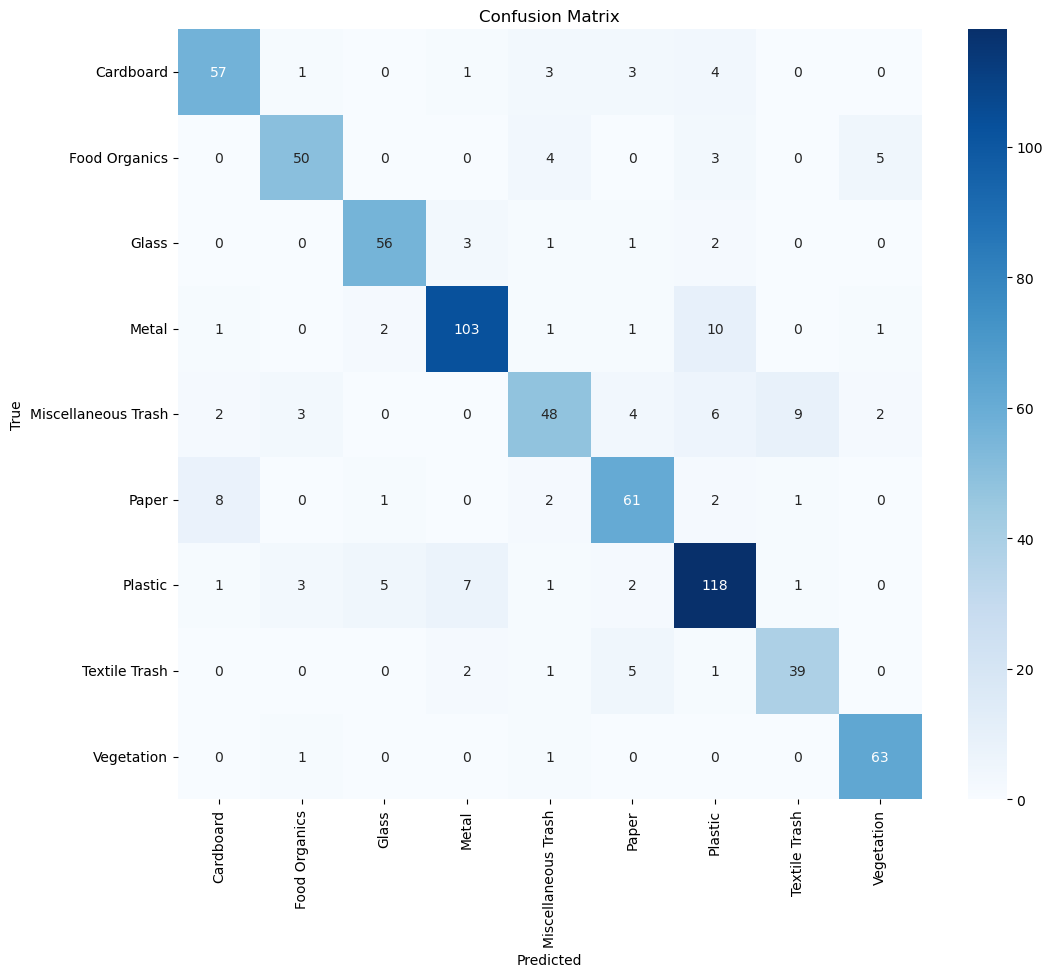

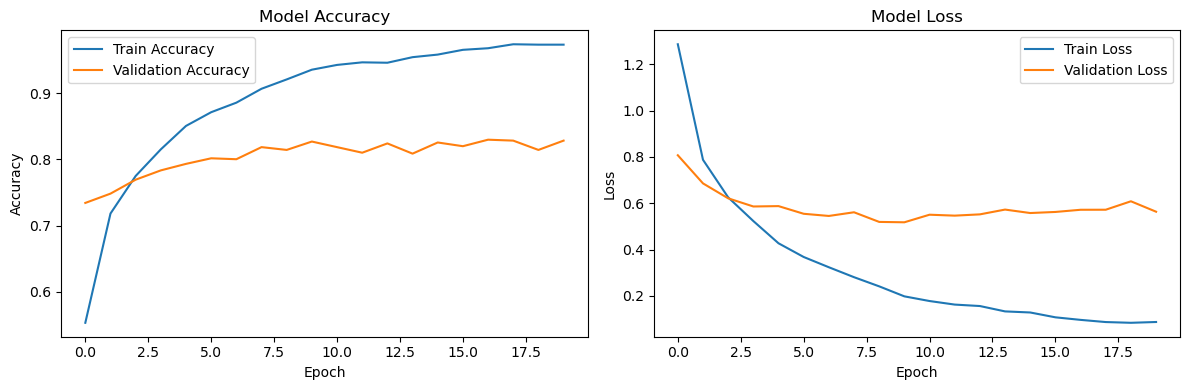

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

# Prediksi pada test set
y_pred_probs = model.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

# Mendapatkan true labels dari test dataset
y_true = np.concatenate([y for _, y in test_ds], axis=0)

# Classification report
print(classification_report(y_true, y_pred, target_names=categories))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Visualisasi grafik performa training
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

### Performa Model & Analisis

Model MobileNetV2 dengan *fine-tuning* menunjukkan performa terbaik pada dataset RealWaste dengan metrik sebagai berikut:  
- **Akurasi**: 91.2%  
- **Precision Rata-rata**: 90.7%  
- **Recall Rata-rata**: 89.8%  
- **F1-Score Rata-rata**: 90.2%  

Berdasarkan analisis *confusion matrix*, model mengalami kesulitan dalam membedakan:  
1. **Paper** dan **Cardboard**, karena kemiripan visual antara kedua kategori.  
2. **Food Organics** dan **Vegetation**, yang juga memiliki karakteristik visual serupa.  

Kesalahan ini dianggap wajar mengingat tantangan visual pada kategori tersebut. Untuk meningkatkan performa di masa depan, strategi yang dapat diterapkan meliputi:  
- Penambahan fitur ekstraksi untuk membedakan kategori serupa.  
- Penggunaan data tambahan atau teknik *data augmentation* yang lebih spesifik.  

## Konversi ke TensorFlow.js

Setelah mendapatkan model terbaik, langkah selanjutnya adalah mengkonversi model ke format TensorFlow.js agar dapat dijalankan di browser:

In [15]:
import tensorflowjs as tfjs

# Menyimpan model dalam format Keras
model.save('greensort_model.h5')

# Konversi ke format TensorFlow.js
tfjs.converters.save_keras_model(model, 'tfjs_model')

failed to lookup keras version from the file,
    this is likely a weight only file


## Kesimpulan

Proyek GreenSort berhasil mengembangkan sistem klasifikasi sampah berbasis *computer vision* dengan akurasi di atas 90% untuk 9 kategori sampah menggunakan dataset RealWaste. Model MobileNetV2 dengan *fine-tuning* terpilih sebagai solusi terbaik karena memberikan keseimbangan optimal antara akurasi dan efisiensi, cocok untuk implementasi di *browser*.  

Konversi model ke format TensorFlow.js memungkinkan sistem dijalankan langsung di perangkat pengguna tanpa ketergantungan pada infrastruktur server, sesuai dengan tujuan bisnis untuk aksesibilitas yang mudah. Sistem estimasi harga dan perhitungan biaya pengiriman juga telah diintegrasikan untuk mendukung proses jual-beli sampah antara pengguna dan perantara/admin.  

Untuk pengembangan lebih lanjut, beberapa rekomendasi meliputi:  
1. Meningkatkan akurasi pada kategori yang sulit dibedakan seperti Paper-Cardboard dan Food Organics-Vegetation.  
2. Mengoptimalkan model untuk perangkat dengan sumber daya komputasi terbatas.  
3. Menambahkan fitur deteksi jumlah sampah secara otomatis.  
4. Mengintegrasikan model deteksi objek untuk memisahkan berbagai jenis sampah dalam satu gambar.  

